In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("traffic_signal_data.csv")
print("Vehicles North Stats:")
print(df['Vehicles North'].describe())
print("\nAvg Wait Time East Stats:")
print(df['Avg Wait Time East'].describe())

Vehicles North Stats:
count    1440.000000
mean       24.574306
std        14.364801
min         0.000000
25%        12.000000
50%        25.000000
75%        36.000000
max        49.000000
Name: Vehicles North, dtype: float64

Avg Wait Time East Stats:
count    1440.000000
mean       59.224306
std        34.218837
min         0.000000
25%        30.000000
50%        59.000000
75%        88.000000
max       119.000000
Name: Avg Wait Time East, dtype: float64


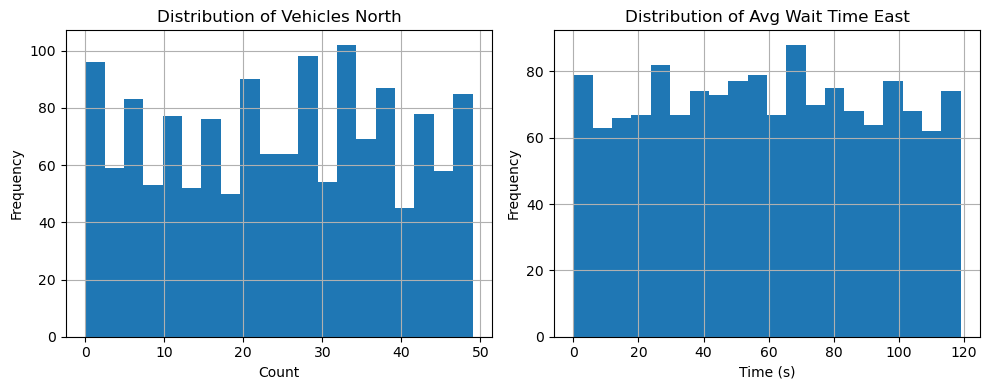

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Vehicles North'].hist(bins=20) # Adjust bin count for histogram clarity
plt.title('Distribution of Vehicles North')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['Avg Wait Time East'].hist(bins=20)
plt.title('Distribution of Avg Wait Time East')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [8]:
print("\nVehicles North Percentiles:")
print(df['Vehicles North'].quantile([0.25, 0.5, 0.75]))


Vehicles North Percentiles:
0.25    12.0
0.50    25.0
0.75    36.0
Name: Vehicles North, dtype: float64


In [12]:
import numpy as np
from sklearn.cluster import KMeans

# Combine all directions into one long column of vehicle counts
all_vehicle_counts = pd.concat([
    df["Vehicles North"],
    df["Vehicles South"],
    df["Vehicles East"],
    df["Vehicles West"]
])

# Reshape for KMeans
X = all_vehicle_counts.values.reshape(-1, 1)

# Apply KMeans clustering with 4 clusters (for 4 levels)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster centers (sorted)
centers = sorted(kmeans.cluster_centers_.flatten())

# Use midpoint between sorted centers as bin edges
vehicle_bins = [0]
for i in range(len(centers) - 1):
    midpoint = (centers[i] + centers[i + 1]) / 2
    vehicle_bins.append(midpoint)
vehicle_bins.append(np.inf)

print("Vehicle bins:", vehicle_bins)

Vehicle bins: [0, 10.811367434170002, 22.834158555508527, 35.78443285559726, inf]
